## 回归

根据因变量的不同，分成几种回归：  
* 连续：多重线性回归(注意与多元线性回归有区别，比如多元自变量是连续的，多重则可以是多种数据类型等)  
* 二项分布：logistic回归
* poisson分布：poisson回归
* 负二项分布：负二项回归

## 逻辑回归

同线性回归一样，需要求出$n$个参数：

$$
z=\theta_0+\theta_1x+\theta_2x+...+\theta_nx=\theta^Tx
$$

逻辑回归通过Sigmoid函数引入了非线性因素，可以轻松处理二分类问题:

$$
h_{\theta}(x)=g\left(\theta^{T} x\right), g(z)=\frac{1}{1+e^{-z}}
$$

与线性回归不同，逻辑回归使用的是交叉熵损失函数:

$$
J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^{m}\left(y^{(i)} \log h_{\theta}\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]\right.
$$

其梯度为:

$$
\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m} \sum_{i=0}^{m}\left(h_{\theta}-y^{i}\left(x^{i}\right)\right) x_{j}^{i}
$$

形式和线性回归一样，但其实假设函数(Hypothesis function)不一样，逻辑回归是:
$$
h_{\theta}(x)=\frac{1}{1+e^{-\theta^{T} x}}
$$

其推导如下:

$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}}\left[-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]\right] \\
&=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{1}{\left.h_{\theta}\left(x^{(i)}\right)\right)} \frac{\partial}{\partial \theta_{j}} h_{\theta}\left(x^{(i)}\right)-\left(1-y^{(i)}\right) \frac{1}{1-h_{\theta}\left(x^{(i)}\right)} \frac{\partial}{\partial \theta_{j}} h_{\theta}\left(x^{(i)}\right)\right] \\
&=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{1}{\left.h_{\theta}\left(x^{(i)}\right)\right)}-\left(1-y^{(i)}\right) \frac{1}{1-h_{\theta}\left(x^{(i)}\right)}\right] \frac{\partial}{\partial \theta_{j}} h_{\theta}\left(x^{(i)}\right) \\
&=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{1}{\left.h_{\theta}\left(x^{(i)}\right)\right)}-\left(1-y^{(i)}\right) \frac{1}{1-h_{\theta}\left(x^{(i)}\right)}\right] \frac{\partial}{\partial \theta_{j}} g\left(\theta^{T} x^{(i)}\right)
\end{aligned}
$$

因为:
$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} g\left(\theta^{T} x^{(i)}\right) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{1+e^{-\theta^{T} x^{(i)}}} \\
&=\frac{e^{-\theta^{T} x^{(i)}}}{\left(1+^{-\theta} T^{T_{x}(i)}\right)^{2}} \frac{\partial}{\partial \theta_{j}} \theta^{T} x^{(i)} \\
&=g\left(\theta^{T} x^{(i)}\right)\left(1-g\left(\theta^{T} x^{(i)}\right)\right) x_{j}^{(i)}
\end{aligned}
$$
所以:
$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} J(\theta) &=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)}\left(1-g\left(\theta^{T} x^{(i)}\right)\right)-\left(1-y^{(i)}\right) g\left(\theta^{T} x^{(i)}\right)\right] x_{j}^{(i)} \\
&=-\frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-g\left(\theta^{T} x^{(i)}\right)\right) x_{j}^{(i)} \\
&=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
\end{aligned}
$$




In [ ]:
# 添加目录到系统路径方便导入模块，该项目的根目录为".../machine-learning-toy-code"
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
p_parent_path = str(Path().absolute().parent.parent)
sys.path.append(p_parent_path) 
print(f"主目录为：{p_parent_path}")

主目录为：d:\py\pycharmProjects\MachineLearning\ML_Sklearn_code


In [29]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

batch_size: 60000
torch.Size([100, 1, 28, 28])
labels: tensor([[7, 0, 6, 3, 3, 6, 8, 4, 7, 5],
        [9, 9, 2, 5, 4, 7, 5, 0, 4, 2],
        [9, 6, 5, 9, 8, 1, 6, 2, 2, 6],
        [0, 8, 5, 4, 4, 8, 0, 7, 0, 5],
        [5, 7, 1, 4, 8, 5, 5, 7, 1, 3],
        [3, 0, 1, 0, 4, 0, 6, 5, 0, 0],
        [8, 0, 7, 6, 2, 8, 6, 6, 3, 8],
        [8, 9, 2, 6, 1, 3, 2, 8, 4, 2],
        [3, 3, 0, 0, 2, 5, 5, 7, 0, 0],
        [1, 0, 2, 7, 9, 1, 4, 1, 5, 3]])
img.shape: (302, 302, 3)


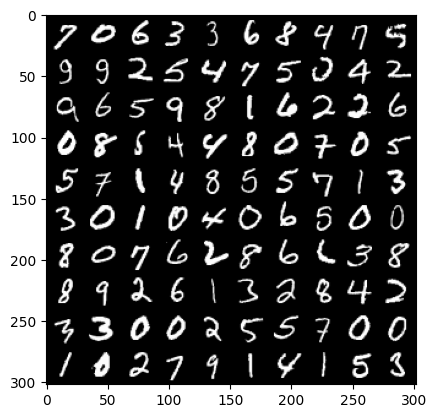

In [ ]:
train_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = True,transform = transforms.ToTensor(), download = False)
test_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = False, 
                               transform = transforms.ToTensor(), download = False)

batch_size = len(train_dataset) # batch_size等于len(train_dataset)，即一次性读取整个数据集
print("batch_size:",batch_size)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
X_train,y_train = next(iter(train_loader))
X_test,y_test = next(iter(test_loader))
# 打印前100张图片
images, labels= X_train[:100], y_train[:100] 
# 使用images生成宽度为10张图的网格大小
img = torchvision.utils.make_grid(images, nrow=10)
# cv2.imshow()的格式是(size1,size1,channels),而img的格式是(channels,size1,size1),
# 所以需要使用.transpose()转换，将颜色通道数放至第三维
img = img.numpy().transpose(1,2,0)
print(images.shape)
print("labels:",labels.reshape(10,10))
print("img.shape:",img.shape)
plt.imshow(img)
plt.show()

In [ ]:
X_train,y_train = X_train.cpu().numpy(),y_train.cpu().numpy() # tensor转为array形式)
X_test,y_test = X_test.cpu().numpy(),y_test.cpu().numpy() # tensor转为array形式)

In [32]:
print(f"数据格式：{type(X_train)}，数据维度：{X_train.shape}")
print(f"数据格式：{type(y_train)}，数据维度：{y_train.shape}")

数据格式：<class 'numpy.ndarray'>，数据维度：(60000, 1, 28, 28)
数据格式：<class 'numpy.ndarray'>，数据维度：(60000,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],784)

In [34]:
print(f"数据格式：{type(X_train)}，数据维度：{X_train.shape}")

数据格式：<class 'numpy.ndarray'>，数据维度：(60000, 784)


In [ ]:
ones_col=[[1] for i in range(len(X_train))] # 生成全为1的二维嵌套列表，即[[1],[1],...,[1]]
X_train_modified=np.append(X_train,ones_col,axis=1)
x_train_modified_mat = np.mat(X_train_modified)
# Mnsit有0-9十个标记，由于是二分类任务，所以可以将标记0的作为1，其余为0用于识别是否为0的任务
y_train_modified=np.array([1 if y_train[i]==1 else 0 for i in range(len(y_train))])

theta = np.mat(np.zeros(len(X_train_modified[0])))
n_epochs=10 
lr = 0.01 # 学习率

def sigmoid(x):
    '''sigmoid函数
    '''
    return 1.0/(1+np.exp(-x))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

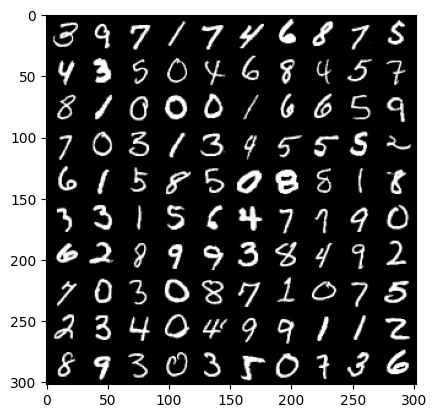

In [ ]:
train_dataset = datasets.MNIST(p_parent_path+'/datasets/', train=True, download=False, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
images, labels = next(iter(train_loader))
print(images)
# 使用images生成宽度为10张图的网格大小
img = torchvision.utils.make_grid(images, nrow=10)
# cv2.imshow()的格式是(size1,size1,channels),而img的格式是(channels,size1,size1),
# 所以需要使用.transpose()转换，将颜色通道数放至第三维
img = img.numpy().transpose(1,2,0)
# print(images.shape)
# print(labels.reshape(10,10))
plt.imshow(img)
plt.show()

In [ ]:

for i_epoch in range(n_epochs):
    loss_epoch = 0
    for i in range(len(X_train_modified)):
        hypothesis = sigmoid(np.dot(X_train_modified[i], theta.T))
        error = y_train_modified[i] - hypothesis
        grad = error * x_train_modified_mat[i]
        theta += lr * grad
        loss_epoch += error.item()
    # loss_epoch /= len(X_train_modified)
    print(f"回合数：{i_epoch+1}/{n_epochs}，损失：{loss_epoch:.4f}")

回合数：1/10，损失：-52.3418
回合数：2/10，损失：-28.2924
回合数：3/10，损失：-17.3631
回合数：4/10，损失：-11.0269
回合数：5/10，损失：-7.0075
回合数：6/10，损失：-4.3320
回合数：7/10，损失：-2.5006
回合数：8/10，损失：-1.2267
回合数：9/10，损失：-0.3334
回合数：10/10，损失：0.2938


In [ ]:
# 逻辑回归训练循环
for i_epoch in range(n_epochs):
    loss_epoch = 0  # 初始化当前epoch的累计损失

    # 遍历所有训练样本（原始实现是SGD，实际是逐个样本更新）
    for i in range(len(X_train_modified)):
        # 1. 计算当前样本的预测概率（通过sigmoid函数）
        # X_train_modified[i]形状(785,), theta.T形状(785,1), 结果标量
        hypothesis = sigmoid(np.dot(X_train_modified[i], theta.T))

        # 2. 计算预测误差（真实标签-预测概率）
        error = y_train_modified[i] - hypothesis  # 标量

        # 3. 计算梯度（原始实现存在维度问题，已修正）
        # x_train_modified_mat[i]形状(1,785), error是标量
        grad = error * x_train_modified_mat[i]  # 广播后形状(1,785)

        # 4. 更新模型参数（注意：梯度下降应为theta -= lr*grad）
        theta += lr * grad  # 此处应为 -=，因error=y-h而非h-y

        # 5. 累计损失（原始实现简单累加误差，建议改用交叉熵）
        loss_epoch += error.item()  # 改为交叉熵更合理：-y*log(h)-(1-y)*log(1-h)

    # 打印训练进度（建议添加平均损失计算）
    print(
        f"回合数：{i_epoch+1}/{n_epochs}，损失：{loss_epoch/len(X_train_modified):.4f}"
    )
    # 注意：这里除以样本数得到平均损失

In [43]:
for i_epoch in range(n_epochs):
    loss_epoch = 0
    # 添加数据打乱
    indices = np.random.permutation(len(X_train_modified))
    X_shuffled = X_train_modified[indices]
    y_shuffled = y_train_modified[indices]

    for i in range(len(X_shuffled)):
        # 前向传播
        z = np.dot(X_shuffled[i], theta.T)
        h = sigmoid(z)

        # 损失计算（交叉熵）
        loss = -(y_shuffled[i] * np.log(h) + (1 - y_shuffled[i]) * np.log(1 - h))
        loss_epoch += loss

        # 梯度计算与参数更新
        error = h - y_shuffled[i]  # 注意符号变化
        grad = error * X_shuffled[i]
        theta -= lr * grad  # 正确的梯度下降方向

    print(f"Epoch {i_epoch+1}: Avg Loss = {loss_epoch/len(X_shuffled):.4f}")

Epoch 1: Avg Loss = 0.0344
Epoch 2: Avg Loss = 0.0308
Epoch 3: Avg Loss = 0.0290
Epoch 4: Avg Loss = 0.0285
Epoch 5: Avg Loss = 0.0280
Epoch 6: Avg Loss = 0.0275
Epoch 7: Avg Loss = 0.0268
Epoch 8: Avg Loss = 0.0267
Epoch 9: Avg Loss = 0.0264
Epoch 10: Avg Loss = 0.0262


In [ ]:
import numpy as np
from sklearn.utils import shuffle


def sigmoid(x):
    """Sigmoid激活函数，带数值稳定性处理"""
    return np.clip(1 / (1 + np.exp(-x)), 1e-8, 1 - 1e-8)  # 避免log(0)


# 超参数设置
n_epochs = 10  # 训练轮次
lr = 0.01  # 初始学习率
batch_size = 32  # 小批量大小
decay_rate = 0.95  # 学习率衰减系数（每epoch衰减）

# 初始化参数（注意：theta应为行向量）
theta = np.zeros(X_train_modified.shape[1])  # shape: (n_features,)

for i_epoch in range(n_epochs):
    # 1. 数据打乱（每epoch重新打乱）
    X_shuffled, y_shuffled = shuffle(X_train_modified, y_train_modified)

    # 2. 学习率衰减（可选）
    current_lr = lr * (decay_rate**i_epoch)

    epoch_loss = 0  # 当前epoch的总损失

    # 3. 小批量训练
    for i in range(0, len(X_shuffled), batch_size):
        # 3.1 获取当前batch
        batch_X = X_shuffled[i : i + batch_size]  # shape: (batch_size, n_features)
        batch_y = y_shuffled[i : i + batch_size]  # shape: (batch_size,)

        # 3.2 前向传播
        logits = np.dot(batch_X, theta)  # 线性部分
        predictions = sigmoid(logits)  # 预测概率

        # 3.3 计算交叉熵损失（带数值稳定性处理）
        loss = -np.mean(
            batch_y * np.log(predictions) + (1 - batch_y) * np.log(1 - predictions)
        )
        epoch_loss += loss * len(batch_X)  # 加权平均准备

        # 3.4 反向传播计算梯度
        error = predictions - batch_y  # shape: (batch_size,)
        grad = np.dot(batch_X.T, error) / batch_size  # shape: (n_features,)

        # 3.5 参数更新（梯度下降）
        theta -= current_lr * grad

    # 4. 计算epoch平均损失
    avg_loss = epoch_loss / len(X_shuffled)

    # 5. 打印训练进度（添加学习率显示）
    print(
        f"Epoch {i_epoch+1:3d}/{n_epochs} | "
        f"Loss: {avg_loss:.4f} | "
        f"LR: {current_lr:.6f}"
    )

Epoch   1/10 | Loss: 0.0952 | LR: 0.010000
Epoch   2/10 | Loss: 0.0531 | LR: 0.009500
Epoch   3/10 | Loss: 0.0467 | LR: 0.009025
Epoch   4/10 | Loss: 0.0436 | LR: 0.008574
Epoch   5/10 | Loss: 0.0417 | LR: 0.008145
Epoch   6/10 | Loss: 0.0404 | LR: 0.007738
Epoch   7/10 | Loss: 0.0394 | LR: 0.007351
Epoch   8/10 | Loss: 0.0387 | LR: 0.006983
Epoch   9/10 | Loss: 0.0380 | LR: 0.006634
Epoch  10/10 | Loss: 0.0375 | LR: 0.006302
